In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from tqdm import tqdm

%pip install numpy==1.24.0

In [2]:
# Check If a String Can Be Converted To Float Using Regular Expressions.
def is_float_regex(value):
    return bool(re.match(r'^[-+]?[0-9]*\.?[0-9]+$', value))

# Check If a String Can Be Converted To Float and the value is not equal to zero.
def is_float_and_not_zero(value):
    return is_float_regex(value) and np.float64(value)!=0

# We do not take the time t=0, because the initial condition is not periodic, however the boundary conditions are taken periodic. At the next time instant the solution will become smoothened and periodic due to diffusion.

In [3]:
# We need to figure out how many nonzero time instants there are in the particular folder, because we want to exclude t=0.
path_to_case_1 = './workdir.1'

time_instants_considered = [i for i in os.listdir(path_to_case_1) if is_float_and_not_zero(i)]
# number_of_time_instants = sum(map(is_float_and_not_zero, os.listdir(path_to_case_1)))
number_of_time_instants = len(time_instants_considered)
print('number_of_time_instants =', number_of_time_instants)

number_of_time_instants = 50


In [4]:
rel_path_to_postproc = 'postProcessing/mySampleDict'
full_path_to_postproc = os.path.join(path_to_case_1, rel_path_to_postproc)

solution_1 = np.loadtxt(os.path.join(full_path_to_postproc, '0' + '/T_constantPlane.raw'), np.float64)

# We want to know the shape of the solution field. Taking the square root, as we know that it is (N, N).
size_for_reshape = np.int64(np.sqrt(np.shape(solution_1[:, 0]))).item()
print('size_for_reshape =', size_for_reshape)

data_X = np.reshape(solution_1[:, 0], (size_for_reshape, size_for_reshape))
data_Y = np.reshape(solution_1[:, 1], (size_for_reshape, size_for_reshape))
data_field = np.reshape(solution_1[:, 3], (size_for_reshape, size_for_reshape))

size_for_reshape = 64


In [21]:
number_of_various_initial_conditions = 10
print('number_of_various_initial_conditions =', number_of_various_initial_conditions)

# Initialize big array, that will contain all solutions at all time instants.
all_T_solutions = np.zeros((number_of_various_initial_conditions, number_of_time_instants, size_for_reshape, size_for_reshape))
print('np.shape(all_T_solutions) =', np.shape(all_T_solutions))

np.shape(all_T_solutions) = (10, 50, 64, 64)


In [22]:
for i in tqdm(range(number_of_various_initial_conditions)):
  full_path_to_postproc = os.path.join('./workdir.' + str(i+1), rel_path_to_postproc)

  if os.path.isdir(full_path_to_postproc):
    for t in range(number_of_time_instants):
      time = time_instants_considered[t]
      full_path_to_solution = os.path.join(full_path_to_postproc, time + '/T_constantPlane.raw')

      if os.path.exists(full_path_to_solution):
        solution_t = np.loadtxt(full_path_to_solution, np.float64)

        # data_X = np.reshape(solution_1[:, 0], (size_for_reshape, size_for_reshape))
        # data_Y = np.reshape(solution_1[:, 1], (size_for_reshape, size_for_reshape))
        field = np.reshape(solution_t[:, 3], (size_for_reshape, size_for_reshape))    

        all_T_solutions[i, t, :, :] = field

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


In [23]:
np.shape(all_T_solutions)

(10, 50, 64, 64)

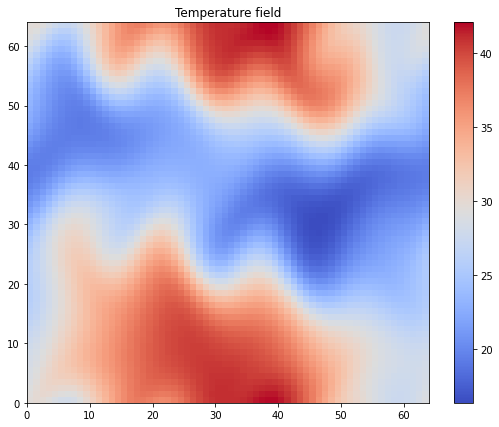

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))

c = ax.pcolormesh(all_T_solutions[1, 9, :, :], cmap='coolwarm')#, vmin=field_min, vmax=field_max)
ax.set_title('Temperature field')

# set the limits of the plot to the limits of the data
# ax.axis([X.min(), X.max(), Y.min(), Y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [27]:
data_file_name = 'advection-diffusion-data.npy'
# np.save(data_file_name, all_T_solutions)

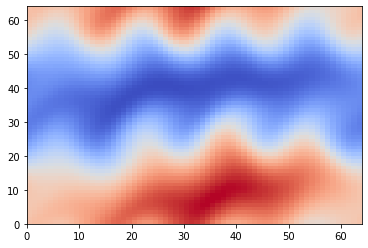

In [32]:
# temp = np.load(data_file_name)
# plt.pcolormesh(temp[10, 10, :, :], cmap='coolwarm')
# plt.show()

In [26]:
# np.shape(temp)

(7, 50, 64, 64)

In [222]:
# a = np.stack([field, field2])
# b = np.append(a, [field3], axis=0)
# np.shape(b)

U = 1.
D = 0.05
C_2 = 1 / (np.exp(U / D) - 1)
C_1 = - U * C_2

def T_analyt(x):
  return C_1 / U + C_2 * np.exp(U * x / D)

plt.plot(X[:, 0], field[:, 5], label='numerical')
plt.plot(X[:, 0], T_analyt(X[:, 0]), label='analyt')

plt.grid(True)
plt.legend()
plt.show()

plt.plot(X[:, 0], T_analyt(X) - field[:, 5])

plt.grid(True)
plt.show()